In [96]:
# install.packages("corrplot")
library(corrplot)

In [97]:
# Read the data set
Auto1 = read.csv("Auto.csv",header=T, fileEncoding = 'UTF-8-BOM')

In [98]:
head(Auto1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
1,18,8,307,130,3504,12.0,70,1
2,15,8,350,165,3693,11.5,70,1
3,18,8,318,150,3436,11.0,70,1
4,16,8,304,150,3433,12.0,70,1
5,17,8,302,140,3449,10.5,70,1
6,15,8,429,198,4341,10.0,70,1


In [99]:
mpg01 = I(Auto1$mpg >= median(Auto1$mpg))

In [100]:
Auto = data.frame(mpg01, Auto1[,-1]); ## replace column "mpg" by "mpg01".

In [101]:
head(Auto)

,mpg01,cylinders,displacement,horsepower,weight,acceleration,year,origin
,<I<lgl>>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
1,FALSE,8,307,130,3504,12.0,70,1
2,FALSE,8,350,165,3693,11.5,70,1
3,FALSE,8,318,150,3436,11.0,70,1
4,FALSE,8,304,150,3433,12.0,70,1
5,FALSE,8,302,140,3449,10.5,70,1
6,FALSE,8,429,198,4341,10.0,70,1


In [102]:
Auto$mpg01 <- as.integer(as.logical(Auto$mpg01))

In [103]:
head(Auto)

,mpg01,cylinders,displacement,horsepower,weight,acceleration,year,origin
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
1,0,8,307,130,3504,12.0,70,1
2,0,8,350,165,3693,11.5,70,1
3,0,8,318,150,3436,11.0,70,1
4,0,8,304,150,3433,12.0,70,1
5,0,8,302,140,3449,10.5,70,1
6,0,8,429,198,4341,10.0,70,1


In [104]:
dim(Auto)

[1] 392   8

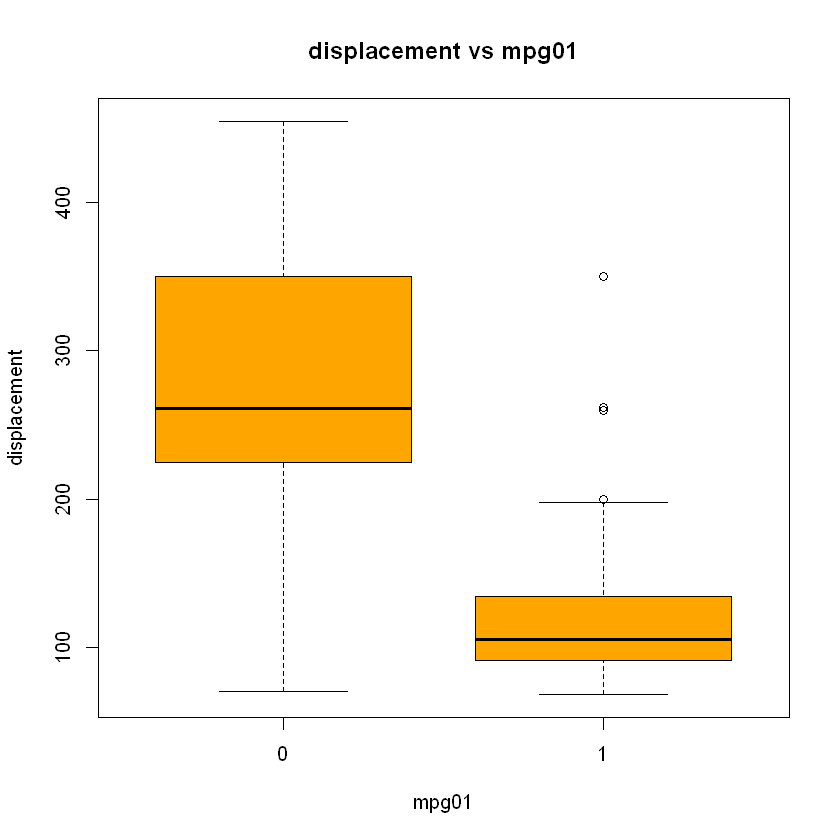

In [105]:
# Create the box plot
boxplot(displacement ~ mpg01, data = Auto,
        main = "displacement vs mpg01",
        xlab = "mpg01",
        ylab = "displacement",
        col = "orange")

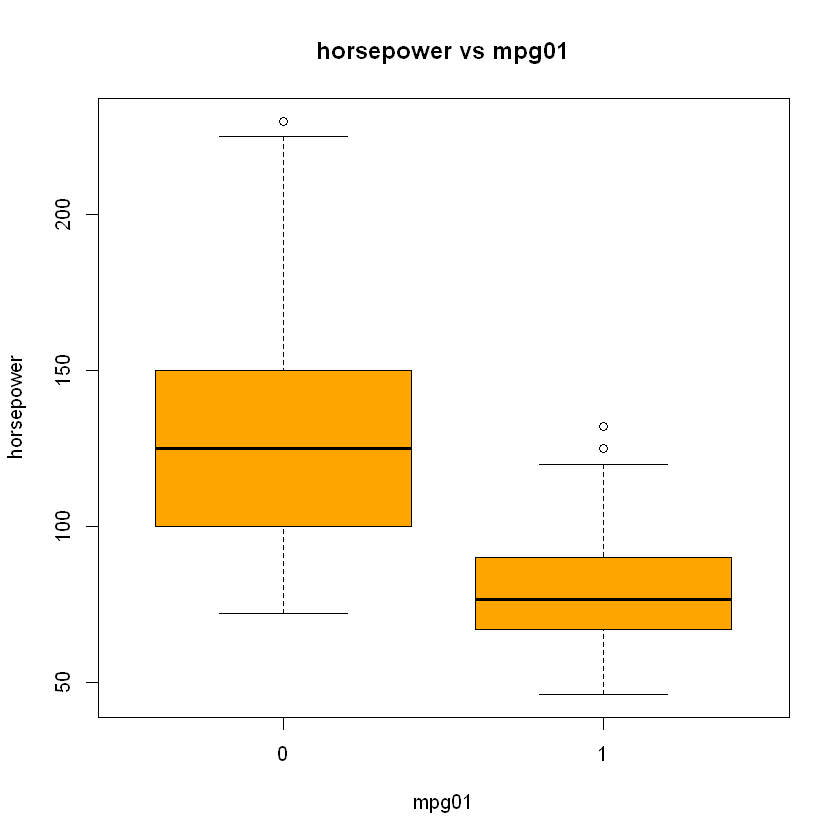

In [106]:
# Create the box plot
boxplot(horsepower ~ mpg01, data = Auto,
        main = "horsepower vs mpg01",
        xlab = "mpg01",
        ylab = "horsepower",
        col = "orange")

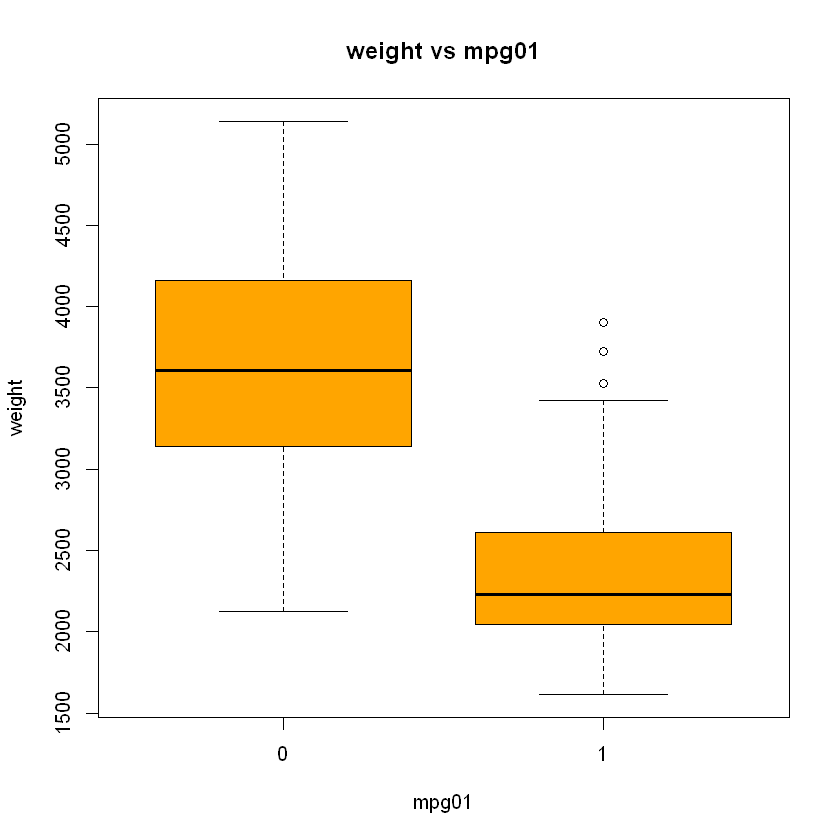

In [107]:
# Create the box plot
boxplot(weight ~ mpg01, data = Auto,
        main = "weight vs mpg01",
        xlab = "mpg01",
        ylab = "weight",
        col = "orange")

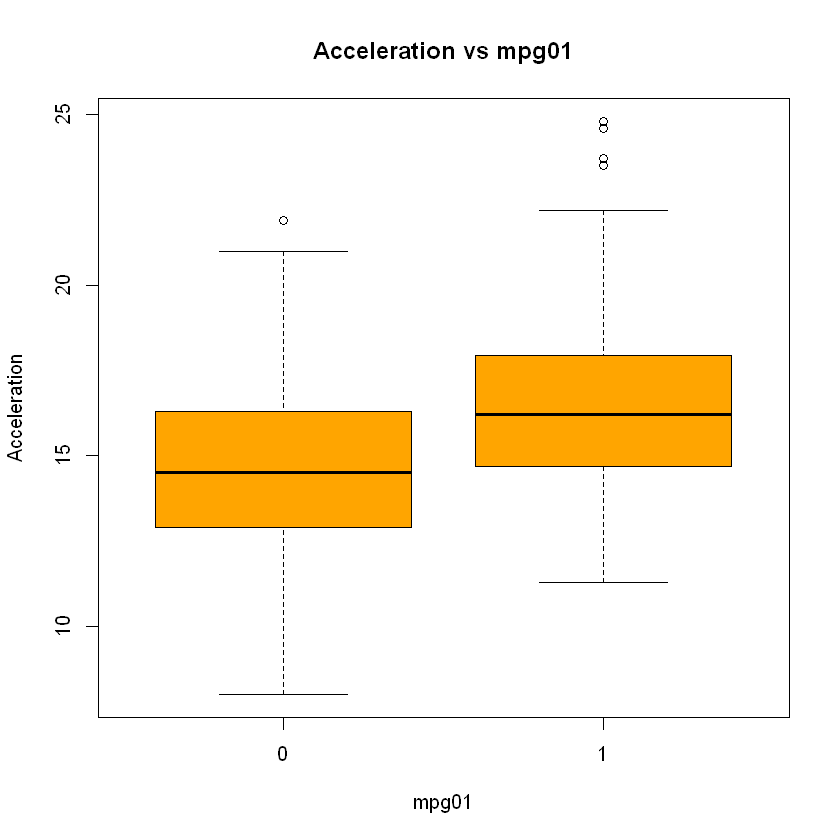

In [108]:
# Create the box plot
boxplot(acceleration ~ mpg01, data = Auto,
        main = "Acceleration vs mpg01",
        xlab = "mpg01",
        ylab = "Acceleration",
        col = "orange")

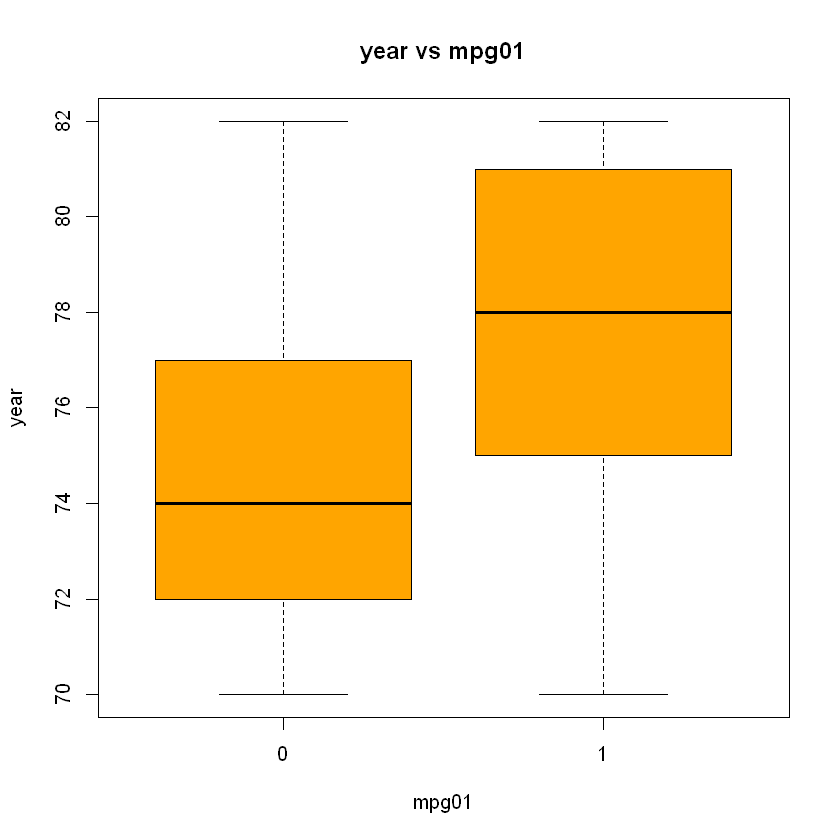

In [109]:
# Create the box plot
boxplot(year ~ mpg01, data = Auto,
        main = "year vs mpg01",
        xlab = "mpg01",
        ylab = "year",
        col = "orange")

In [110]:
# Set a random seed for reproducibility
set.seed(7406)

# Calculate the number of rows for the training set (80%)
n <- nrow(Auto)
train_size <- 0.8 * n

# Generate random indices for the training set
train_indices <- sample(1:n, train_size)

# Create the training and testing sets
trainAuto <- Auto[train_indices, ]
testAuto <- Auto[-train_indices, ]

In [111]:
#check the size of training & testing datasets
dim(trainAuto)
dim(testAuto)

[1] 313   8

[1] 79  8

In [112]:
summary(trainAuto)

     mpg01          cylinders      displacement     horsepower   
 Min.   :0.0000   Min.   :3.000   Min.   : 68.0   Min.   : 46.0  
 1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 76.0  
 Median :1.0000   Median :4.000   Median :151.0   Median : 92.0  
 Mean   :0.5112   Mean   :5.486   Mean   :194.5   Mean   :104.2  
 3rd Qu.:1.0000   3rd Qu.:8.000   3rd Qu.:302.0   3rd Qu.:129.0  
 Max.   :1.0000   Max.   :8.000   Max.   :455.0   Max.   :230.0  
     weight      acceleration       year           origin     
 Min.   :1613   Min.   : 8.5   Min.   :70.00   Min.   :1.000  
 1st Qu.:2230   1st Qu.:13.8   1st Qu.:73.00   1st Qu.:1.000  
 Median :2800   Median :15.4   Median :76.00   Median :1.000  
 Mean   :2982   Mean   :15.5   Mean   :75.99   Mean   :1.585  
 3rd Qu.:3645   3rd Qu.:17.0   3rd Qu.:79.00   3rd Qu.:2.000  
 Max.   :5140   Max.   :24.8   Max.   :82.00   Max.   :3.000  

In [113]:
cor(trainAuto)

,mpg01,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg01,1.0000000,-0.7767570,-0.7707405,-0.6812701,-0.7638823,0.3438696,0.4439462,0.5181776
cylinders,-0.7767570,1.0000000,0.9517190,0.8461730,0.8983974,-0.4899511,-0.3593053,-0.5670154
displacement,-0.7707405,0.9517190,1.0000000,0.8958560,0.9344989,-0.5366188,-0.3816242,-0.6216291
horsepower,-0.6812701,0.8461730,0.8958560,1.0000000,0.8667294,-0.6782203,-0.4212060,-0.4665435
weight,-0.7638823,0.8983974,0.9344989,0.8667294,1.0000000,-0.3988307,-0.3215474,-0.5891905
acceleration,0.3438696,-0.4899511,-0.5366188,-0.6782203,-0.3988307,1.0000000,0.2690182,0.2331145
year,0.4439462,-0.3593053,-0.3816242,-0.4212060,-0.3215474,0.2690182,1.0000000,0.1585869
origin,0.5181776,-0.5670154,-0.6216291,-0.4665435,-0.5891905,0.2331145,0.1585869,1.0000000


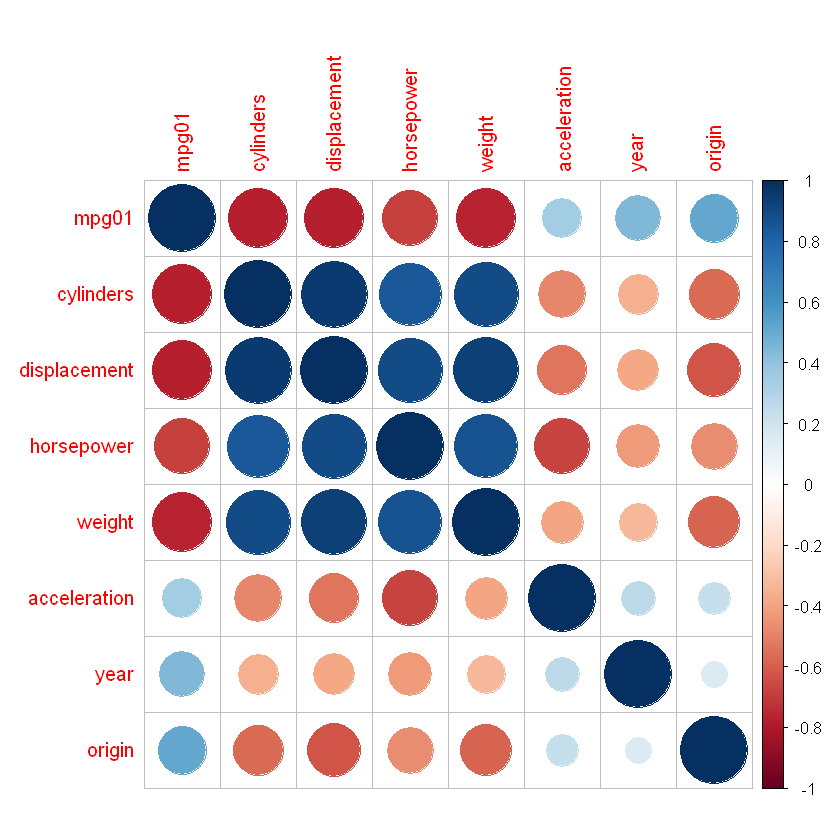

In [114]:
# Create a heatmap for the correlation matrix
corrplot(cor(trainAuto))

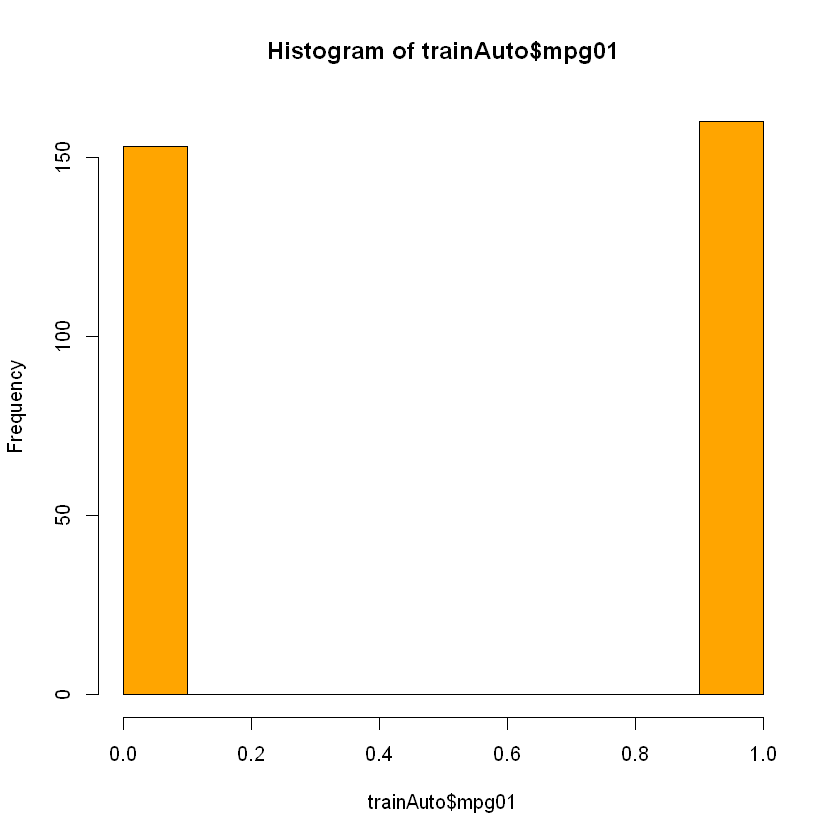

In [115]:
hist(trainAuto$mpg01, col="orange")

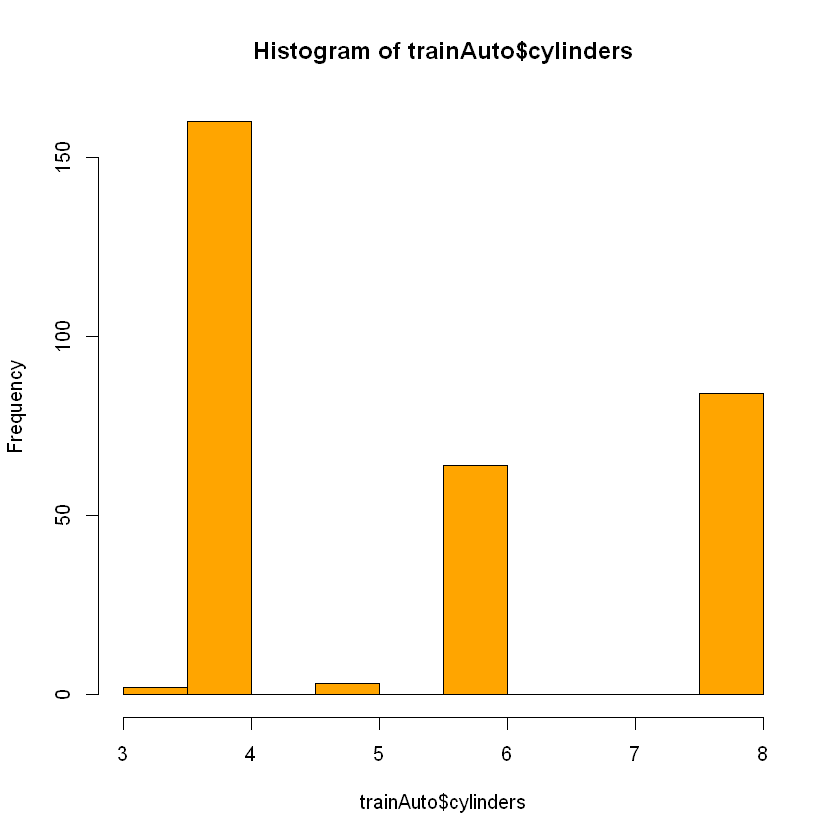

In [116]:
hist(trainAuto$cylinders, col="orange")

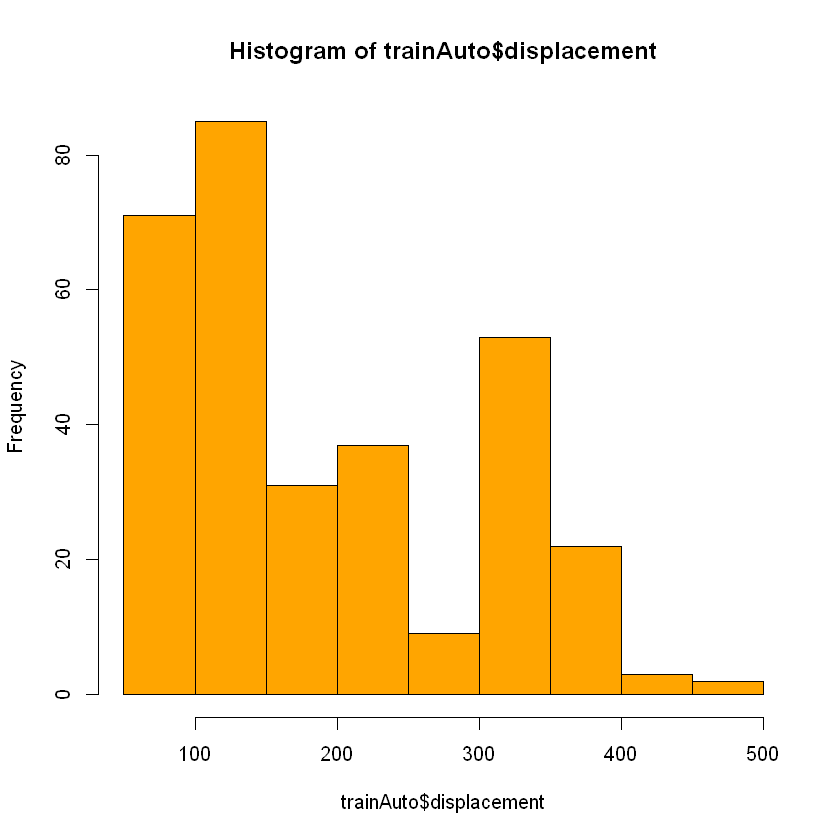

In [117]:
hist(trainAuto$displacement, col="orange")

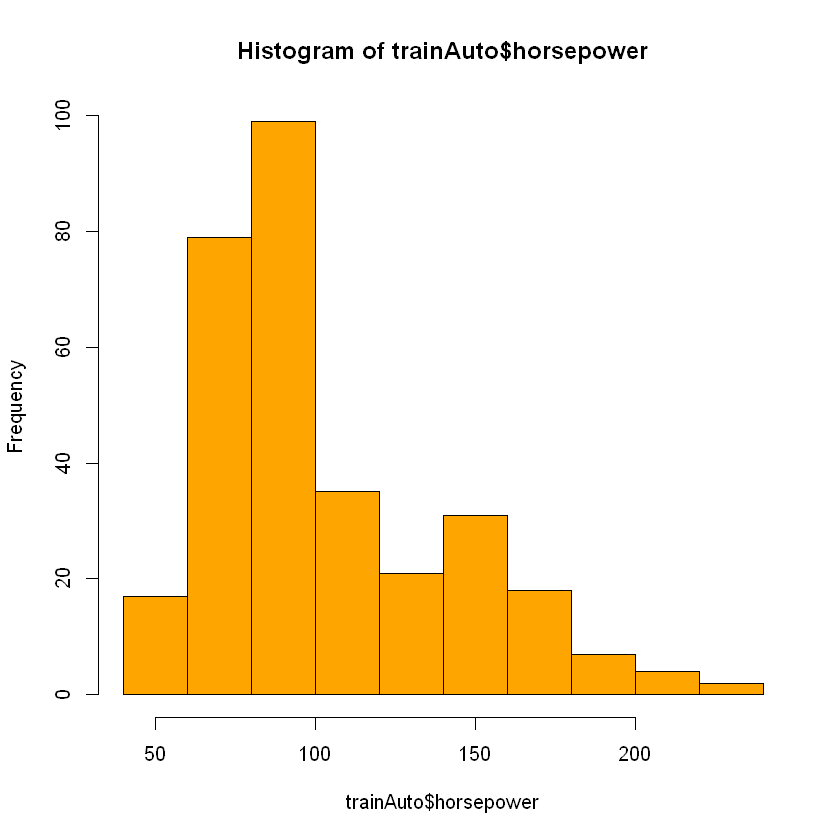

In [118]:
hist(trainAuto$horsepower, col="orange")

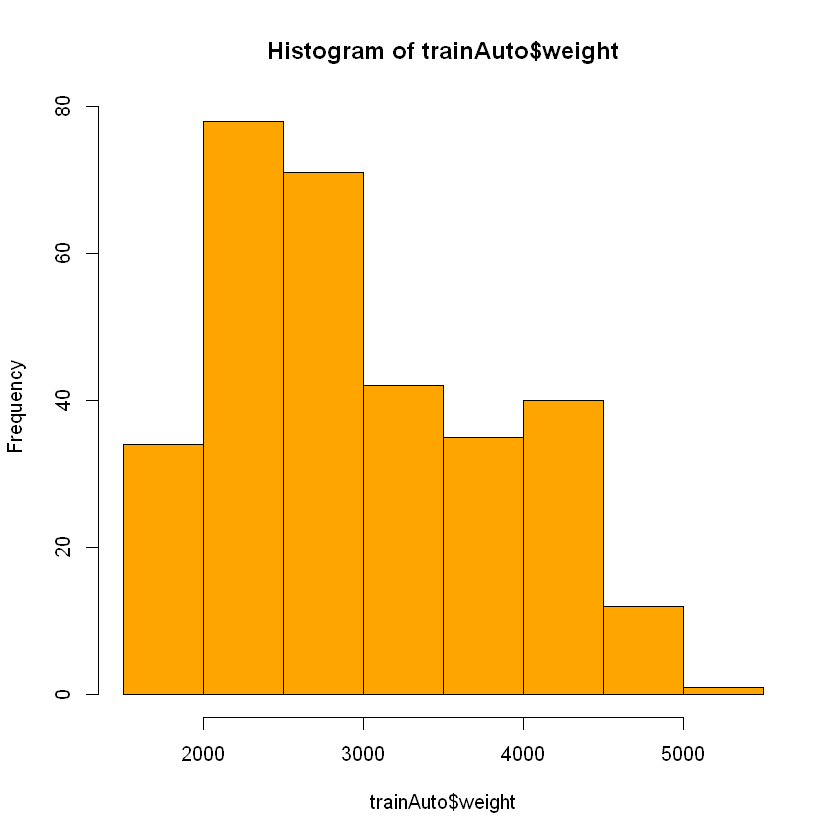

In [119]:
hist(trainAuto$weight, col="orange")

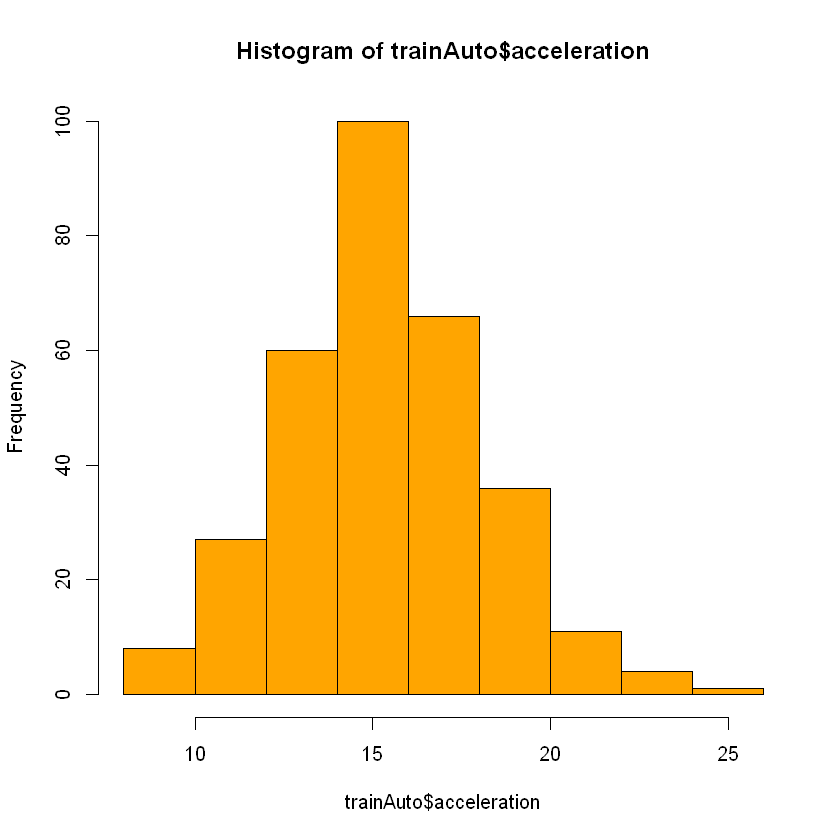

In [120]:
hist(trainAuto$acceleration, col="orange")

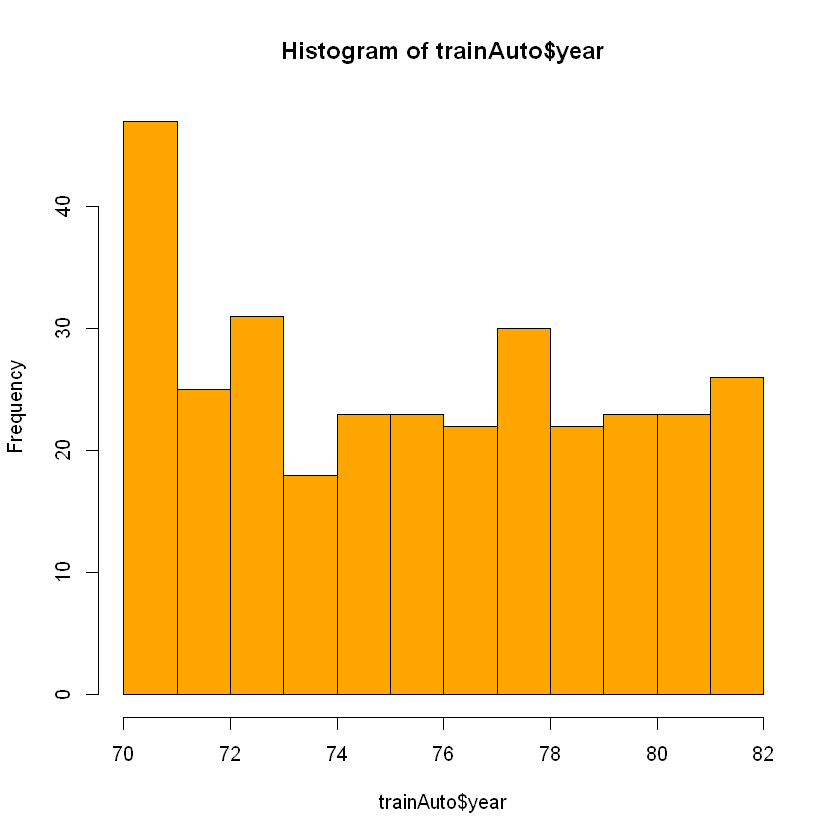

In [121]:
hist(trainAuto$year, col="orange")

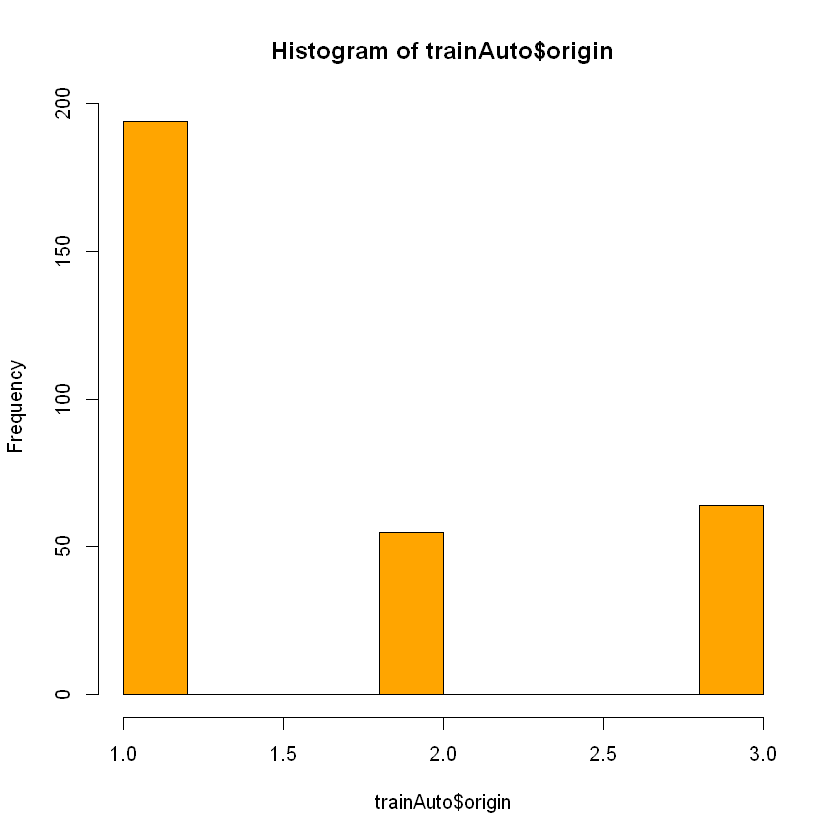

In [122]:
hist(trainAuto$origin, col="orange")

In [123]:
## The placeholder for the training errors and testing errors
TrainErr <- NULL;
TestErr  <- NULL;

In [124]:
#acceleration & year have correlation around 0.5. We will drop them
trainAuto <- trainAuto[,-6:-8]
testAuto <- testAuto[,-6:-8]

In [125]:
head(trainAuto)

,mpg01,cylinders,displacement,horsepower,weight
,<int>,<int>,<dbl>,<int>,<int>
132,0,6,250.0,100,3781
118,1,4,116.0,75,2158
58,1,4,97.5,80,2126
233,1,4,151.0,88,2740
353,1,4,119.0,100,2615
381,1,6,181.0,110,2945


In [151]:
#Model 1: LDA
library(MASS)
mod1 <- lda(trainAuto[,2:5], trainAuto[,1]) 

## training error 
pred1 <- predict(mod1,trainAuto[,2:5])$class; 
TrainErr <- c(TrainErr, mean(pred1  != trainAuto$mpg01)); 
TrainErr; 

## testing error 
pred1test <- predict(mod1,testAuto[,2:5])$class; 
TestErr <- c(TestErr,mean(pred1test != testAuto$mpg01));  
TestErr;


[1] 0.09265176 0.09265176 0.09904153 0.09904153 0.08306709 0.07667732
 [7] 0.08626198 0.10862620 0.10862620 0.10543131 0.10543131 0.04792332
[13] 0.09265176

[1] 0.11392405 0.10126582 0.11392405 0.12658228 0.12658228 0.12658228
 [7] 0.12658228 0.11392405 0.11392405 0.11392405 0.11392405 0.08860759
[13] 0.11392405

In [127]:
## Model 2: QDA
mod2 <- qda(trainAuto[,2:5], trainAuto[,1])

## Training Error 
pred2 <- predict(mod2,trainAuto[,2:5])$class
TrainErr <- c(TrainErr, mean(pred1  != trainAuto$mpg01))
TrainErr

##  Testing Error 
pred2test <- predict(mod2,testAuto[,2:5])$class
TestErr <- c(TestErr, mean(pred2test != testAuto$mpg01))
TestErr




[1] 0.09265176 0.09265176

[1] 0.1139241 0.1012658

In [128]:
#Model 3: Naive Bayes
library(e1071)
mod3 <- naiveBayes(trainAuto[,2:5], trainAuto[,1])

## Training Error
pred3 <- predict(mod3, trainAuto[,2:5]);
TrainErr <- c(TrainErr, mean( pred3 != trainAuto$mpg01))
TrainErr 

## Testing Error 
pred3test <- predict(mod3,testAuto[,2:5])
TestErr <- c(TestErr,  mean(pred3test != testAuto$mpg01))
TestErr

[1] 0.09265176 0.09265176 0.09904153

[1] 0.1139241 0.1012658 0.1139241

In [129]:
#Model 4: Logistic Regression
mod4 = glm(mpg01~., data=trainAuto, family='binomial'(link="logit"))
summary(mod4)


Call:
glm(formula = mpg01 ~ ., family = binomial(link = "logit"), data = trainAuto)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2930  -0.1054   0.1073   0.3335   3.4701  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  12.265272   2.017769   6.079 1.21e-09 ***
cylinders    -0.025213   0.389304  -0.065  0.94836    
displacement -0.015404   0.009078  -1.697  0.08973 .  
horsepower   -0.046848   0.016166  -2.898  0.00376 ** 
weight       -0.001752   0.000783  -2.238  0.02522 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 433.75  on 312  degrees of freedom
Residual deviance: 157.03  on 308  degrees of freedom
AIC: 167.03

Number of Fisher Scoring iterations: 7


In [130]:
# Calculate the 95% confidence interval for the coefficients using the Wald interval
confint.default(mod4, level = 0.95, parms=c())

,2.5 %,97.5 %
(Intercept),8.310516256,16.2200273355
cylinders,-0.788233968,0.7378080841
displacement,-0.033197863,0.0023891219
horsepower,-0.078532335,-0.0151632233
weight,-0.003287054,-0.0002177011


In [131]:
#displacement and cylinders have zeros in their CI --> they are not statistically significant

In [132]:
# Calculate overall significance of the model
1-pchisq((mod4$null.dev - mod4$deviance),
         (mod4$df.null - mod4$df.resid))

[1] 0

In [133]:
#The p-value equals zero, so we can reject the null hypothesis that the slope coefficient is equal to zero and conclude that the model is significant overall.

In [134]:
#Perform goodness-of-fit hypothesis tests using both Deviance and Pearson residuals.

In [135]:
# Deviance residuals test
cat("Deviance residuals test p-value:",
1-pchisq(mod4$deviance, mod4$df.residual), end="\n")

Deviance residuals test p-value: 1 


In [136]:
# Pearson residuals test
pResid <- resid(mod4, type = "pearson")
cat("Pearson residuals test p-value:",
1-pchisq(sum(pResid^2), mod4$df.residual))

Pearson residuals test p-value: 0

In [137]:
#Deviance residuals test is large while Pearson residuals test is small suggests that the model might be a good fit

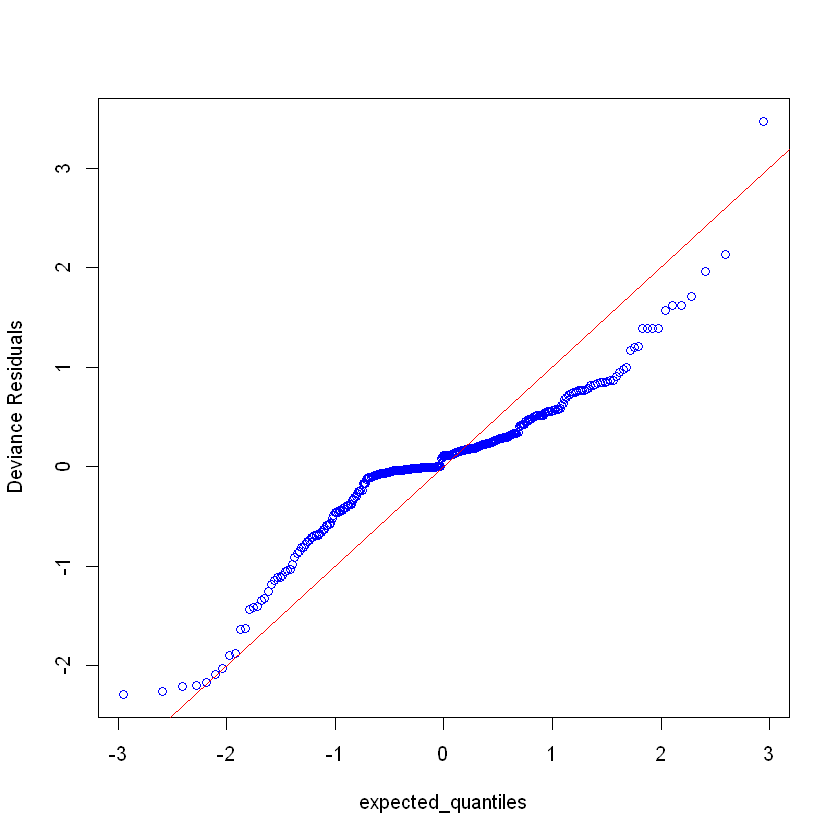

In [138]:
# Store the deviance residuals
res4 <- resid(mod4, type = "deviance")

# Generate expected quantiles from a standard normal distribution
expected_quantiles <- qnorm(ppoints(length(res4)))

# Create the QQ plot
qqplot(x = expected_quantiles, y = res4, ylab = "Deviance Residuals", col="blue")

# Add a reference line
abline(a = 0, b = 1, col = "red")

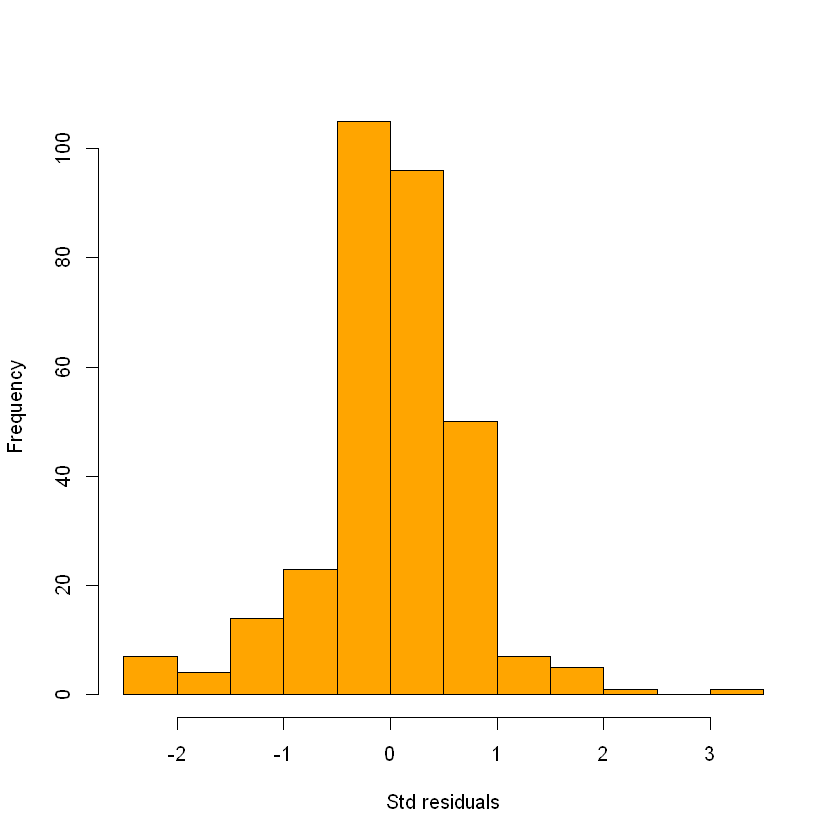

In [139]:
hist(res4,10,xlab="Std residuals", main="", col="orange")

In [140]:
#normality assumption does not hold. based on the above we can say that the model is not a good fit. However, it is statistically significant so it can make predicitions

In [141]:
## Training Error  of model 4 (logisitic regression)
pred4 <- predict(mod4, trainAuto[,2:5],type="response")
pred4 <- ifelse(pred4 >0.5, 1, 0)
TrainErr <- c(TrainErr, mean(pred4  != trainAuto$mpg01))
TrainErr

## Testing Error of model 4 (logisitic regression)
pred4test <- predict(mod4,testAuto[,2:5],type="response")
pred4test <- ifelse(pred4test >0.5, 1, 0)
TestErr <- c(TestErr, mean(pred4test != testAuto$mpg01) )
TestErr

[1] 0.09265176 0.09265176 0.09904153 0.09904153

[1] 0.1139241 0.1012658 0.1139241 0.1265823

In [142]:
#Model 5: KNN
library(class);
trrerror <-NULL
for (kk in c(3,5,7,9,11,13,15)){
pred5 <- knn(trainAuto[,-1], trainAuto[,-1], trainAuto[,1], k=kk);
trainerror <- mean(pred5 != trainAuto[,1])  #calculate training error for each k
print(trainerror) 
trrerror <- c(trrerror, trainerror);
    }
TrainErr <- c(TrainErr, trrerror)
TrainErr

[1] 0.08306709
[1] 0.07667732
[1] 0.08626198
[1] 0.1086262
[1] 0.1086262
[1] 0.1054313
[1] 0.1054313


[1] 0.09265176 0.09265176 0.09904153 0.09904153 0.08306709 0.07667732
 [7] 0.08626198 0.10862620 0.10862620 0.10543131 0.10543131

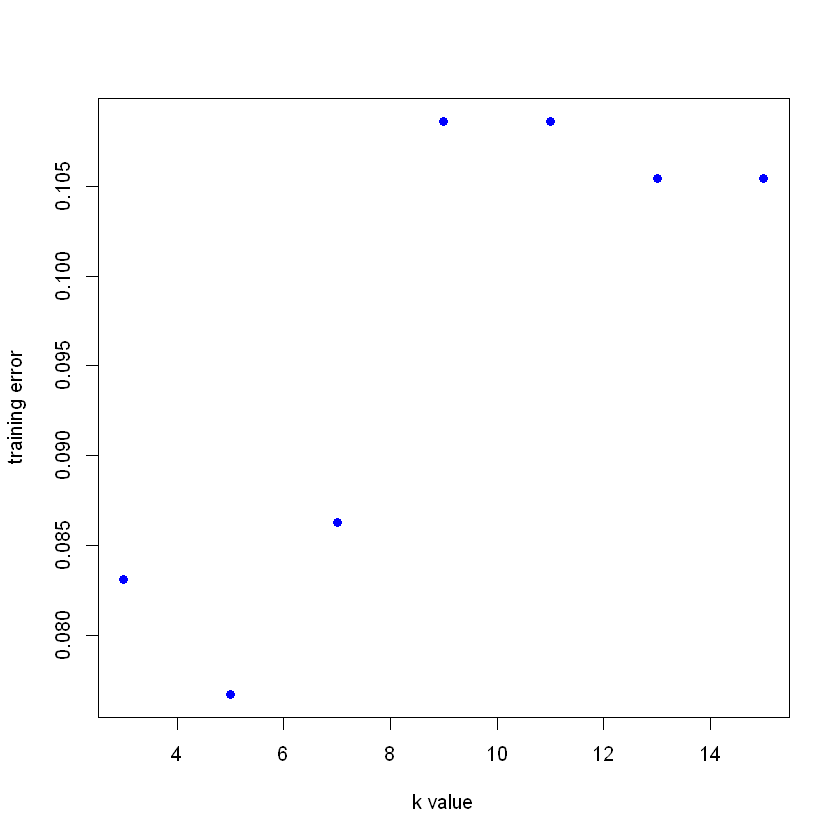

In [143]:
#plot the training error of KNN
plot(c(3,5,7,9,11,13,15), trrerror, xlab="k value", ylab="training error", col='blue', pch=19)

In [144]:
#KNN testing error
tsrerror <-NULL
for (kk in c(3,5,7,9,11,13,15)){
pred5test <- knn(trainAuto[,-1], testAuto[,-1], trainAuto[,1], k=kk);
testerror <- mean(pred5test != testAuto[,1])  #calculate testing error for each k
print(testerror) 
tsrerror <- c(tsrerror, testerror);
    }
TestErr <- c(TestErr, tsrerror)
TestErr

[1] 0.1265823
[1] 0.1265823
[1] 0.1265823
[1] 0.1139241
[1] 0.1139241
[1] 0.1139241
[1] 0.1139241


[1] 0.1139241 0.1012658 0.1139241 0.1265823 0.1265823 0.1265823 0.1265823
 [8] 0.1139241 0.1139241 0.1139241 0.1139241

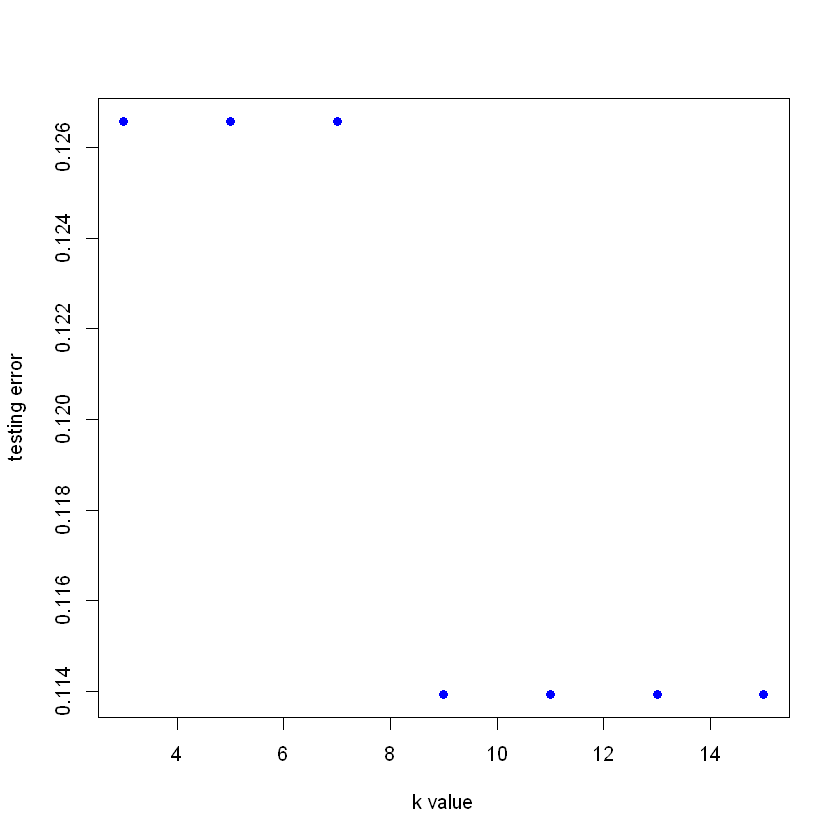

In [145]:
#plot the testing error of KNN model
plot(c(3,5,7,9,11,13,15), tsrerror, xlab="k value", ylab="testing error", col='blue', pch=19)

In [146]:
# #Model 6: SVM
# library(e1071)

# # Create an SVM model with a linear kernel
# mod6 <- svm(trainAuto[, 2:5], trainAuto[, 1], type = "C-classification", kernel = "linear", cost = 100, scale = TRUE)

# ## Training Error
# pred6 <- predict(mod6, trainAuto[, 2:5])
# TrainErr <- c(TrainErr, mean( pred6 != trainAuto$mpg01))
# TrainErr 

# ## Testing Error 
# pred6test <- predict(mod6,testAuto[,2:5])
# TestErr <- c(TestErr,  mean(pred6test != testAuto$mpg01))
# TestErr

In [147]:
#Model 6: SVM
library(e1071)

C_list <- 1:1000
count <- 1
err_list <- vector()

for (i in C_list){
    mod6 <- svm(trainAuto[, 2:5], trainAuto[, 1], type = "C-classification", kernel = "radial", cost = C_list[i], scale = TRUE)
    pred6 <- predict(mod6, trainAuto[, 2:5])
    error <- mean(pred6 != trainAuto$mpg01)
    err_list[count] <- error
    count <- count + 1
}

# Find the index with the lowest error
min_error_index <- which.min(err_list)
min_error_value <- err_list[min_error_index]

[1] 124

[1] 0.04792332

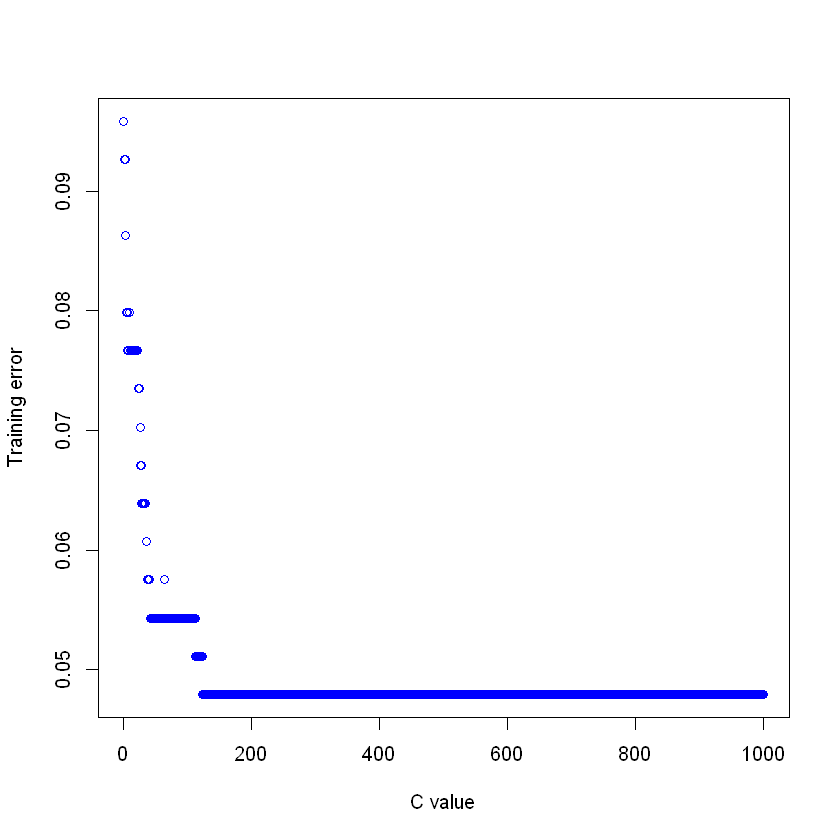

In [148]:
min_error_index
min_error_value


plot(C_list, err_list, xlab="C value", ylab="Training error", col="blue")

In [149]:
#build the SVM with the optimal C value
mod6 <- svm(trainAuto[, 2:5], trainAuto[, 1], type = "C-classification", kernel = "radial", cost = min_error_index, scale = TRUE)

## Training Error
pred6 <- predict(mod6, trainAuto[, 2:5])
TrainErr <- c(TrainErr, mean( pred6 != trainAuto$mpg01))
TrainErr 

## Testing Error 
pred6test <- predict(mod6,testAuto[,2:5])
TestErr <- c(TestErr,  mean(pred6test != testAuto$mpg01))
TestErr

[1] 0.09265176 0.09265176 0.09904153 0.09904153 0.08306709 0.07667732
 [7] 0.08626198 0.10862620 0.10862620 0.10543131 0.10543131 0.04792332

[1] 0.11392405 0.10126582 0.11392405 0.12658228 0.12658228 0.12658228
 [7] 0.12658228 0.11392405 0.11392405 0.11392405 0.11392405 0.08860759

In [55]:
#Run Monte Carlo cross validation on all the models
# save the TE values for all models in all $B=100$ loops
B= 100; ### number of loops
TEALL = NULL; ### Final TE values
set.seed(7406); ### You might want to set the seed for randomization
for (b in 1:B){

# Calculate the number of rows for the training set (80%)
n <- nrow(Auto)
n1 <- 0.8 * n

# Create the training and testing sets
flag <- sort(sample(1:n, n1));
trainAuto1 <- Auto[flag,-6:-8] ## temp training set for CV
testAuto1 <- Auto[-flag,-6:-8] ## temp testing set for CV
    
#Model 1: LDA
mod1 <- lda(trainAuto1[,2:5], trainAuto1[,1]) 
ypred1test <- predict(mod1,testAuto1[,2:5])$class; 
te1 <- mean(ypred1test != testAuto1$mpg01)  

## Model 2: QDA
mod2 <- qda(trainAuto1[,2:5], trainAuto1[,1])
ypred2test <- predict(mod2,testAuto1[,2:5])$class
te2 <- mean(ypred2test != testAuto1$mpg01)

#Model 3: Naive Bayes
mod3 <- naiveBayes(trainAuto1[,2:5], trainAuto1[,1])
ypred3test <- predict(mod3,testAuto1[,2:5])
te3 <- mean(ypred3test != testAuto1$mpg01)

#Model 4: Logistic Regression
mod4 = glm(mpg01~., data=trainAuto1, family='binomial'(link="logit"))
ypred4test <- predict(mod4,testAuto1[,2:5],type="response")
ypred4test <- ifelse(ypred4test >0.5, 1, 0)
te4 <- mean(ypred4test != testAuto1$mpg01)

#model 5: KNN
cverror <- NULL    
for (kk in c(3,5,7,9,11,13,15)){ 
    ypred5test <- knn(trainAuto1[,2:5], testAuto1[,-1], trainAuto1[,1], k=kk);
    temptesterror <- mean(ypred5test != testAuto1[,1]);
    cverror <- cbind(cverror, temptesterror); 
  }
    
#Model 6: SVM
#find optimal C
C_list <- 1:400
count <- 1
err_list <- vector()

for (i in C_list){
    mod6 <- svm(trainAuto1[, 2:5], trainAuto1[, 1], type = "C-classification", kernel = "radial", cost = C_list[i], scale = TRUE)
    pred6 <- predict(mod6, trainAuto1[, 2:5])
    error <- mean(pred6 != trainAuto1$mpg01)
    err_list[count] <- error
    count <- count + 1
}

# Find the index with the lowest error
min_error_index <- which.min(err_list)    
    
mod6 <- svm(trainAuto1[, 2:5], trainAuto1[, 1], type = "C-classification", kernel = "radial", cost = min_error_index, scale = TRUE)
ypred6test <- predict(mod6,testAuto1[,2:5])
te6 <- mean(ypred6test != testAuto1$mpg01)

    

TEALL = rbind( TEALL, cbind(te1, te2, te3, te4, cverror, te6) )    
   
    }
colnames(TEALL) <- c("LDA", "QDA", "Naive Bayes", "Logisitc Reg", "KNN3", "mod5:K5", "KNN7", "KNN9", "KNN11", "KNN13", "KNN15", "SVM");

In [69]:
## You can report the sample mean and sample variances for the seven models
apply(TEALL, 2, mean);
apply(TEALL, 2, var);

LDA          QDA  Naive Bayes Logisitc Reg         KNN3      mod5:K5 
  0.10227848   0.10886076   0.10227848   0.10886076   0.12189873   0.11708861 
        KNN7         KNN9        KNN11        KNN13        KNN15          SVM 
  0.12367089   0.12405063   0.12379747   0.12632911   0.12746835   0.08658228

LDA          QDA  Naive Bayes Logisitc Reg         KNN3      mod5:K5 
0.0010865910 0.0010261241 0.0009635855 0.0010423090 0.0012127524 0.0013866432 
        KNN7         KNN9        KNN11        KNN13        KNN15          SVM 
0.0014140929 0.0012753719 0.0014099657 0.0014242084 0.0014607054 0.0008633685

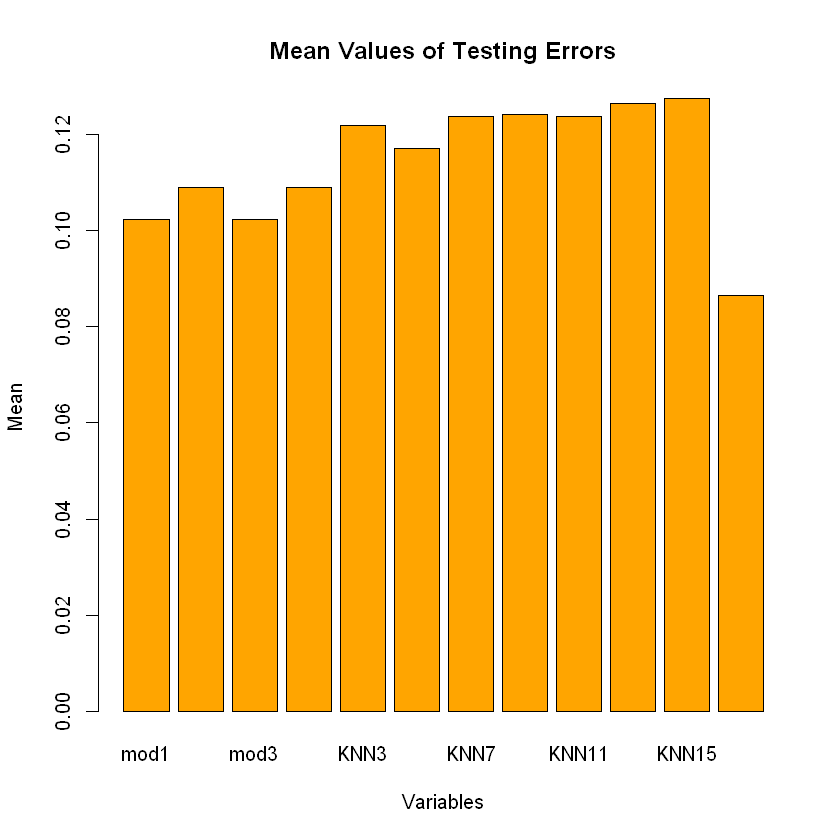

In [78]:
mean_values <- apply(TEALL, 2, mean)

# Getting variable names
variable_names <- colnames(TEALL)

# Creating a bar plot
barplot(mean_values, names.arg = variable_names,
        main = "Mean Values of Testing Errors",
        xlab = "Variables",
        ylab = "Mean",
        col = "orange")

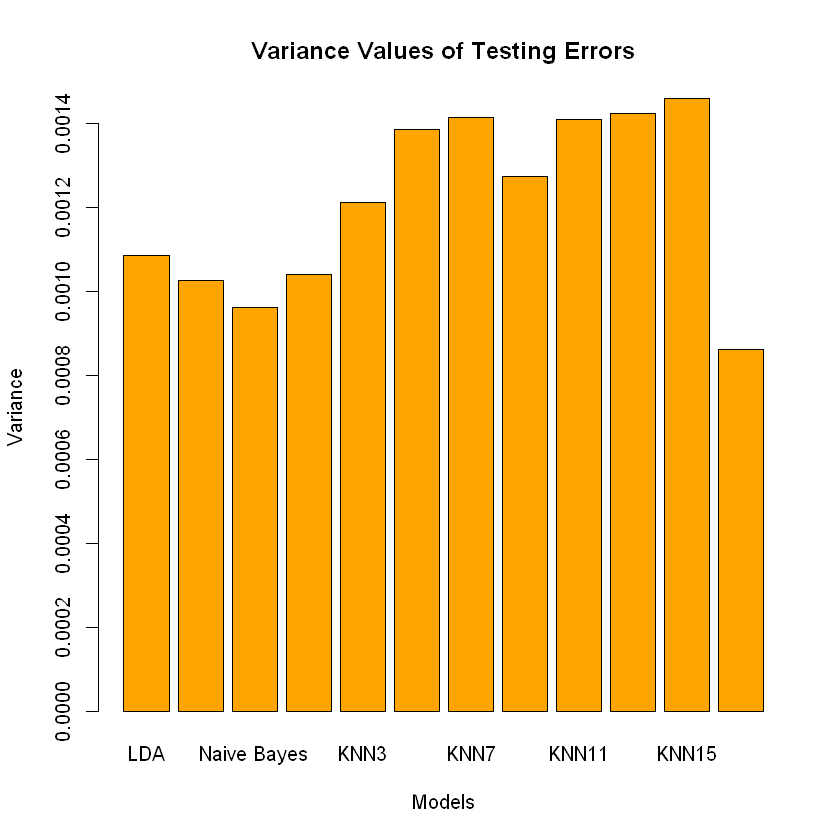

In [66]:
variance_values <- apply(TEALL, 2, var)

# Creating a bar plot
barplot(variance_values, names.arg = variable_names,
        main = "Variance Values of Testing Errors",
        xlab = "Models",
        ylab = "Variance",
        col = "orange")